In [1]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
opt = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=opt)

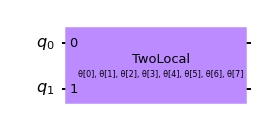

In [2]:
ansatz.draw()

In [3]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator_statevector')

In [4]:
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend=backend, shots=800, seed_simulator=99)

In [6]:
from qiskit.opflow import X, Z, I

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

In [7]:
from qiskit.utils import algorithm_globals
seed = 50
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
slsqp = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.55146158e-05+0.j, -9.93766272e-01+0.j,  1.11483575e-01+0.j,
        1.77493990e-05+0.j]),
    'eigenvalue': (-1.8572750175664259+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 4.296520455019831,
                              ParameterVectorElement(θ[1]): 4.426962083985579,
                              ParameterVectorElement(θ[7]): 0.3602072577510429,
                              ParameterVectorElement(θ[6]): -4.717618171283927,
                              ParameterVectorElement(θ[5]): 1.5683260003556614,
                              ParameterVectorElement(θ[4]): -2.5983258978150006,
                              ParameterVectorElement(θ[3]): 6.092947779034692,
                              ParameterVectorElement(θ[2]): 0.5470754664946292},
    'optimal_point': array([ 4.29652046,  4.42696208,  0.54707547,  6.09294778, -2.5983259 ,
        1.568326  , -4.71761817,  0.3

In [8]:
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('aer_simulator_statevector'), seed_transpiler=seed, seed_simulator=seed)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
slsqp = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=slsqp)

vqe.quantum_instance = qi
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.55146158e-05+0.j, -9.93766272e-01+0.j,  1.11483575e-01+0.j,
        1.77493990e-05+0.j]),
    'eigenvalue': (-1.8572750175664259+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 4.296520455019831,
                              ParameterVectorElement(θ[2]): 0.5470754664946292,
                              ParameterVectorElement(θ[1]): 4.426962083985579,
                              ParameterVectorElement(θ[7]): 0.3602072577510429,
                              ParameterVectorElement(θ[6]): -4.717618171283927,
                              ParameterVectorElement(θ[3]): 6.092947779034692,
                              ParameterVectorElement(θ[5]): 1.5683260003556614,
                              ParameterVectorElement(θ[4]): -2.5983258978150006},
    'optimal_point': array([ 4.29652046,  4.42696208,  0.54707547,  6.09294778, -2.5983259 ,
        1.568326  , -4.71761817,  0.3

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.3
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.1
qiskit-nature,0.2.1
qiskit-finance,0.2.1
qiskit-optimization,0.2.3
qiskit-machine-learning,0.2.1
